In [70]:
 #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '9f5a4e70-a3e2-4764-8160-aa91abfddeb9',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-10-17T16:07:21.691Z', 'error_code': 0, 'error_message': None, 'elapsed': 49, 'credit_count': 1, 'notice': None, 'total_count': 9876}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11778, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [72]:
import pandas as pd

# Remove column limit so we can see all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [74]:
# Normalises the data
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11778,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19768928.00000,19768928.00000,False,NaN,1,None,None,None,2024-10-17T16:04:00.000Z,67463.18139,31571096235.24360,-30.52300,0.53545,-0.50977,10.68740,10.25544,12.61731,1.84336,1333674775558.52393,57.57330,1416726809199.20996,None,2024-10-17T16:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-17 17:07:26.758826
1,1027,Ethereum,ETH,ethereum,9427,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120387362.76296,120387362.76296,True,NaN,2,None,None,None,2024-10-17T16:04:00.000Z,2625.81982,14954150865.65364,-22.29350,0.72176,0.64560,8.74240,10.03285,-1.88979,-24.76032,316115522811.30194,13.65330,316115522811.29999,None,2024-10-17T16:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-17 17:07:26.758826
2,825,Tether USDt,USDT,tether,100563,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,119973576281.55081,121362937383.07553,True,NaN,3,None,None,None,2024-10-17T16:04:00.000Z,0.99994,53251489983.94674,-26.79570,0.04650,0.01307,0.10695,-0.00809,-0.02147,-0.02679,119966462197.20850,5.17940,121355740913.66000,None,2024-10-17T16:04:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-17 17:07:26.758826
3,1839,BNB,BNB,bnb,2261,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145931687.78251,145931687.78251,False,NaN,4,None,None,None,2024-10-17T16:04:00.000Z,593.74993,1798012153.46245,-4.88470,0.47030,-0.38423,4.96538,7.85121,10.11308,0.06330,86646929046.50401,3.74050,86646929046.50000,None,2024-10-17T16:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-17 17:07:26.758826
4,5426,Solana,SOL,solana,767,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,469846799.28091,586712789.76104,True,NaN,5,None,None,None,2024-10-17T16:04:00.000Z,152.66106,2017767225.35156,-26.50660,0.59903,-1.95973,10.03679,13.20068,4.57545,-10.91671,71727308474.84341,3.09670,89568193976.70000,None,2024-10-17T16:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-17 17:07:26.758826


In [76]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'5',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '9f5a4e70-a3e2-4764-8160-aa91abfddeb9',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    # Normalises the data
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2])


In [80]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed succesfully')
    sleep(60) # Will sleep for 60 seconds
exit()

{'status': {'timestamp': '2024-10-17T16:07:47.485Z', 'error_code': 0, 'error_message': None, 'elapsed': 16, 'credit_count': 1, 'notice': None, 'total_count': 9876}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11778, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [82]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11778,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19768928.00000,19768928.00000,False,NaN,1,None,None,None,2024-10-17T16:04:00.000Z,67463.18139,31571096235.24360,-30.52300,0.53545,-0.50977,10.68740,10.25544,12.61731,1.84336,1333674775558.52393,57.57330,1416726809199.20996,None,2024-10-17T16:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-17 17:07:26.758826
1,1027,Ethereum,ETH,ethereum,9427,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120387362.76296,120387362.76296,True,NaN,2,None,None,None,2024-10-17T16:04:00.000Z,2625.81982,14954150865.65364,-22.29350,0.72176,0.64560,8.74240,10.03285,-1.88979,-24.76032,316115522811.30194,13.65330,316115522811.29999,None,2024-10-17T16:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-17 17:07:26.758826
2,825,Tether USDt,USDT,tether,100563,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,119973576281.55081,121362937383.07553,True,NaN,3,None,None,None,2024-10-17T16:04:00.000Z,0.99994,53251489983.94674,-26.79570,0.04650,0.01307,0.10695,-0.00809,-0.02147,-0.02679,119966462197.20850,5.17940,121355740913.66000,None,2024-10-17T16:04:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-17 17:07:26.758826
3,1839,BNB,BNB,bnb,2261,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145931687.78251,145931687.78251,False,NaN,4,None,None,None,2024-10-17T16:04:00.000Z,593.74993,1798012153.46245,-4.88470,0.47030,-0.38423,4.96538,7.85121,10.11308,0.06330,86646929046.50401,3.74050,86646929046.50000,None,2024-10-17T16:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-17 17:07:26.758826
4,5426,Solana,SOL,solana,767,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,469846799.28091,586712789.76104,True,NaN,5,None,None,None,2024-10-17T16:04:00.000Z,152.66106,2017767225.35156,-26.50660,0.59903,-1.95973,10.03679,13.20068,4.57545,-10.91671,71727308474.84341,3.09670,89568193976.70000,None,2024-10-17T16:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-17 17:07:26.758826
0,1,Bitcoin,BTC,bitcoin,11778,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19768928.00000,19768928.00000,False,NaN,1,None,None,None,2024-10-17T16:05:00.000Z,67395.95934,31567289991.22365,-30.36310,0.50420,-0.62792,10.68298,10.15850,12.49792,1.94182,1332345867733.15552,57.51600,1415315146192.87012,None,2024-10-17T16:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-17 17:07:47.439234
1,1027,Ethereum,ETH,ethereum,9427,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120387362.76296,120387362.76296,True,NaN,2,None,None,None,2024-10-17T16:05:00.000Z,2624.05164,14934501380.91974,-22.24750,0.74597,0.57970,8.75464,9.94722,-1.98672,-24.66597,315902656174.99677,13.64410,315902656175.00000,None,2024-10-17T16:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-17 17:07:47.439234
2,825,Tether USDt,USDT,tether,100563,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,119973576281.55081,121362937383.07553,True,NaN,3,None,None,None,2024-10-17T16:05:00.000Z,0.99967,53230453778.42545,-26.65640,-0.02682,-0.01066,0.06347,-0.03783,-0.05157,-0.07791,119933983300.28696,5.18060,121322885892.95000,None,2024-10-17T16:05:00.000Z,1027.00000,Ethereum,ETH,

In [34]:
# Formatting the numbers
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [84]:
# Calculate the average percentage change for each time period (1h, 24h, 7d, etc.) grouped by coin name
df3 = df.groupby('name', sort=False)[[
    'quote.USD.percent_change_1h', 
    'quote.USD.percent_change_24h', 
    'quote.USD.percent_change_7d', 
    'quote.USD.percent_change_30d', 
    'quote.USD.percent_change_60d', 
    'quote.USD.percent_change_90d'
]].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.52660,-0.43356,10.77012,10.20330,12.61077,1.93234
Ethereum,0.76957,0.74705,8.96275,9.99216,-1.81468,-24.64172
Tether USDt,0.00527,-0.00336,0.07738,-0.02787,-0.06134,-0.04875
BNB,0.45806,-0.35281,4.91698,7.82179,10.08860,0.15348
Solana,0.58269,-1.96081,9.90162,13.14301,4.48498,-10.83302


In [102]:
# Convert the columns into rows by stacking them, resulting in a Series with a multi-level index
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.52660
             quote.USD.percent_change_24h    -0.43356
             quote.USD.percent_change_7d     10.77012
             quote.USD.percent_change_30d    10.20330
             quote.USD.percent_change_60d    12.61077
             quote.USD.percent_change_90d     1.93234
Ethereum     quote.USD.percent_change_1h      0.76957
             quote.USD.percent_change_24h     0.74705
             quote.USD.percent_change_7d      8.96275
             quote.USD.percent_change_30d     9.99216
             quote.USD.percent_change_60d    -1.81468
             quote.USD.percent_change_90d   -24.64172
Tether USDt  quote.USD.percent_change_1h      0.00527
             quote.USD.percent_change_24h    -0.00336
             quote.USD.percent_change_7d      0.07738
             quote.USD.percent_change_30d    -0.02787
             quote.USD.percent_change_60d    -0.06134
             quote.USD.percent_change_90

In [88]:
# Convert the stacked Series into a DataFrame and name the single column 'values'

df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.52660
            quote.USD.percent_change_24h  -0.43356
            quote.USD.percent_change_7d   10.77012
            quote.USD.percent_change_30d  10.20330
            quote.USD.percent_change_60d  12.61077
            quote.USD.percent_change_90d   1.93234
Ethereum    quote.USD.percent_change_1h    0.76957
            quote.USD.percent_change_24h   0.74705
            quote.USD.percent_change_7d    8.96275
            quote.USD.percent_change_30d   9.99216
            quote.USD.percent_change_60d  -1.81468
            quote.USD.percent_change_90d -24.64172
Tether USDt quote.USD.percent_change_1h    0.00527
            quote.USD.percent_change_24h  -0.00336
            quote.USD.percent_change_7d    0.07738
            quote.USD.percent_change_30d  -0.02787
            quote.USD.percent_change_60d  -0.06134
            quote.USD.percent_change_90d  -0.04875
BNB         quote.USD.percent_change_1h    0.45806
            quote.USD.percent_change_24h  -0.35281
            quote.USD.percent_change_7d    4.91698
            quote.USD.percent_change_30d   7.82179
            quote.USD.percent_change_60d  10.08860
            quote.USD.percent_change_90d   0.15348
Solana      quote.USD.percent_change_1h    0.58269
            quote.USD.percent_change_24h  -1.96081
            quote.USD.percent_change_7d    9.90162
            quote.USD.percent_change_30d  13.14301
            quote.USD.percent_change_60d   4.48498
            quote.USD.percent_change_90d -10.83302

In [90]:
# Shows a count of rows in df5

df5.count()

values    30
dtype: int64

In [94]:
# Reset the index of the DataFrame and convert the index levels into regular columns

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.52660
1,Bitcoin,quote.USD.percent_change_24h,-0.43356
2,Bitcoin,quote.USD.percent_change_7d,10.77012
3,Bitcoin,quote.USD.percent_change_30d,10.20330
4,Bitcoin,quote.USD.percent_change_60d,12.61077
5,Bitcoin,quote.USD.percent_change_90d,1.93234
6,Ethereum,quote.USD.percent_change_1h,0.76957
7,Ethereum,quote.USD.percent_change_24h,0.74705
8,Ethereum,quote.USD.percent_change_7d,8.96275
9,Ethereum,quote.USD.percent_change_30d,9.99216


In [96]:
# Rename the 'level_1' column to 'percent_change' for better clarity and understanding

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.52660
1,Bitcoin,quote.USD.percent_change_24h,-0.43356
2,Bitcoin,quote.USD.percent_change_7d,10.77012
3,Bitcoin,quote.USD.percent_change_30d,10.20330
4,Bitcoin,quote.USD.percent_change_60d,12.61077
5,Bitcoin,quote.USD.percent_change_90d,1.93234
6,Ethereum,quote.USD.percent_change_1h,0.76957
7,Ethereum,quote.USD.percent_change_24h,0.74705
8,Ethereum,quote.USD.percent_change_7d,8.96275
9,Ethereum,quote.USD.percent_change_30d,9.99216


In [98]:
# Replace the detailed percent change column names with shorter, more readable labels (e.g., '1h', '24h', '7d')

df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1h', '24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.52660
1,Bitcoin,24h,-0.43356
2,Bitcoin,7d,10.77012
3,Bitcoin,30d,10.20330
4,Bitcoin,60d,12.61077
5,Bitcoin,90d,1.93234
6,Ethereum,1h,0.76957
7,Ethereum,24h,0.74705
8,Ethereum,7d,8.96275
9,Ethereum,30d,9.99216


In [58]:
# Importing seaborn library

import seaborn as sns

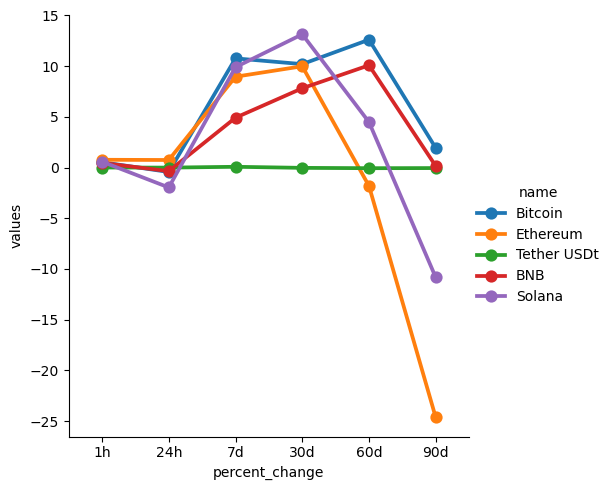

In [100]:
# Create a point plot to visualize the percent change over different time periods for each cryptocurrency

sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')